In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# Use the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
# Using the Scikit-Learn Library, train the Logistic Regression model using the following
# 1.All six cases of using two features at a time.
# 2.All four cases of using three features at a time.
# 3.The one case of using all features at once.
cases_list = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3], # six cases of using two features
             [0,1,2],[0,2,3],[0,1,3],[1,2,3],      # four cases of using three features
             [0,1,2,3]]                            # one case of using all features 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
test_accurcy_list = []

In [68]:
for cases in cases_list:
    x = iris.data[:,cases]
    y = iris.target
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


    lr_classifier = LogisticRegression(max_iter=1000,C=1, random_state=0, solver='liblinear')
    lr_classifier.fit(x_train, y_train)
    y_pred = lr_classifier.predict(x_test)
    test_accurcy = accuracy_score(y_test, y_pred)
    test_accurcy_list.append(test_accurcy)

In [69]:
test_accurcy_list

[0.6,
 0.8333333333333334,
 0.7666666666666667,
 0.7,
 0.8,
 0.7,
 0.8333333333333334,
 0.9333333333333333,
 0.8666666666666667,
 0.9333333333333333,
 0.9666666666666667]

In [72]:
# Summarize the results and draw them.

- For these 11 cases, we found that when the training data, the number of iterations(1000) and parameter C(1) were fixed, the last case (all the features were selected) obtained the best results, and AUC reached 0.96
- According to the document, liblinear internally uses the coordinate axis descent method to iteratively optimize the loss function. Due to the small amount of iris data, liblinear is more applicable

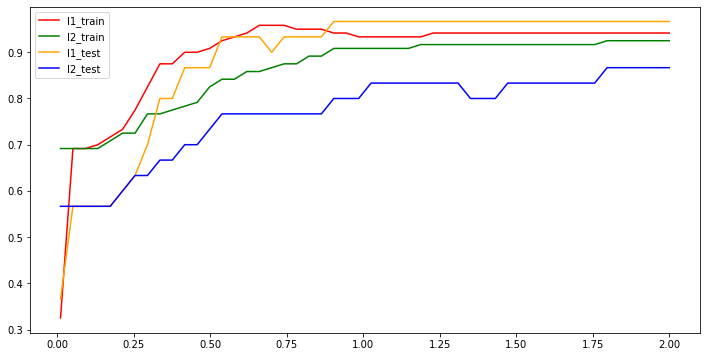

In [73]:
# Play with both L1 and L2 regularization and vary the regularization parameter C.
x = iris.data[:,[1,3]]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


l1_train_predict = []
l2_train_predict = []

l1_test_predict = []
l2_test_predict = []

for c in np.linspace(0.01, 2, 50) :
    lr_l1 = LogisticRegression(penalty="l1", C=c, solver="liblinear", max_iter=1000)
    lr_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=1000)
    
    # The training model records the performance of L1 regularization model on the training set and test set
    lr_l1.fit(x_train, y_train)
    l1_train_predict.append(accuracy_score(lr_l1.predict(x_train), y_train))
    l1_test_predict.append(accuracy_score(lr_l1.predict(x_test), y_test))
    
    # The training model records the performance of L2 regularization model on the training set and test set
    lr_l2.fit(x_train, y_train)
    l2_train_predict.append(accuracy_score(lr_l2.predict(x_train), y_train))
    l2_test_predict.append(accuracy_score(lr_l2.predict(x_test), y_test))
    
data = [l1_train_predict, l2_train_predict, l1_test_predict, l2_test_predict]
label = ['l1_train', 'l2_train', 'l1_test', "l2_test"]
color = ['red', 'green', 'orange', 'blue']

plt.figure(figsize=(12, 6))
for i in range(4) :
    plt.plot(np.linspace(0.01, 2, 50), data[i], label=label[i], color=color[i])

plt.legend(loc="best")
plt.show()


In [74]:
# 6.Discuss your findings. Does using more dimensions help when trying to classify the data in this dataset? 
#  How important is regularization in these cases?

- The use of more dimension data will really help the training effect
- It can be seen that, at least in our iris dataset, the results of the two regularization are not very different. However, with the gradual increase of C, the intensity of regularization becomes smaller and smaller. The performance of the model in the training set and test set shows an upward trend. Until C = 0.8, the performance in the training set is still rising, but the performance of the model in the unknown data set begins to decline. At this time, there is over fitting. We can think that it would be better to set C to 0.9. In actual use, L2 regularization is basically used by default. If you feel that the effect of the model is not good, try L1